<a href="https://colab.research.google.com/github/Akshitha181203/PortfolioOptimization/blob/main/ipynbs/Compare_RAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init

In [1]:
! pip install setuptools==65.5.0
! pip install -q stable_baselines3
! pip install -q PyPortfolioOpt
! pip install -q yahoo-finance
! pip install -q yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
## install required packages
!pip install swig
!pip install wrds
!pip install pyportfolioopt
## install finrl library
!pip install setuptools==65.5.0
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.2 MB/s eta 0:00:00
  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /tmp/pip-req-build-adelw0kc
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/FinRL.git /tmp/pip-req-build-adelw0kc
  Resolved https://github.com/AI4Finance-Foundation/FinRL.git to commit 69776b349ee4e63efe3826f318aef8e5c5f59648
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-0vewt_9y/elegantrl_2afc77b86e744ca08b31d5ec836d1e78
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-0vewt_9y/elegantrl_2afc77b86e744ca08b31d5ec836d1e78
  Resolved https://github.com/AI4Finance-Foundation/Eleg

In [3]:
!pip install pandas_market_calendars

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.9/123.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.4/198.4 kB 8.3 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.meta.env_portfolio_allocation.env_portfolio import StockPortfolioEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

/usr/local/lib/python3.11/dist-packages/pandas_datareader/compat/__init__.py:11: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  PANDAS_VERSION = LooseVersion(pd.__version__)
/usr/local/lib/python3.11/dist-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [5]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

In [6]:
!pip install pandas_datareader
!pip install gym

In [7]:
import sys
import seaborn as sns
import torch.nn as nn
import torch.optim as optim
import copy
from typing import Any, Dict, List, Optional, Tuple, Type, TypeVar, Union
import torch as th
from torch.nn import functional as F
from stable_baselines3 import PPO,SAC
from stable_baselines3.common.buffers import ReplayBuffer
from stable_baselines3.common.noise import ActionNoise
from stable_baselines3.common.off_policy_algorithm import OffPolicyAlgorithm
from stable_baselines3.common.policies import BasePolicy
from stable_baselines3.common.type_aliases import GymEnv, MaybeCallback, Schedule
from stable_baselines3.common.utils import get_parameters_by_name, polyak_update
from stable_baselines3.sac.policies import CnnPolicy, MlpPolicy, MultiInputPolicy, SACPolicy
import yfinance as yf
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pandas_datareader import data as pdr
import numpy as np
import random
import math
import time
import gym
from gym.utils import seeding
from gym import spaces
from stable_baselines3.common.vec_env import DummyVecEnv
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import objective_functions
from pypfopt.efficient_frontier import EfficientFrontier
import torch
from collections import namedtuple, deque
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Dataset

In [8]:
# tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "JPM", "BAC", "V", "JNJ"]

# # start_date = '2013-06-04'
# # end_date = "2022-11-20"
# df = yf.download(tickers, interval="60m", period="730d")
# df = df.dropna(axis=0)
# data = df.copy()
# data = data['Adj Close']
# data.shape

# train_pct = 1
# samples_train = int(train_pct*len(data))
# # print(len(data))
# data_train = data[:samples_train]
# data_test = data[samples_train:]

# plt.rcParams["figure.figsize"] = (10, 6)
# for i in tickers:
#     plt.plot(data[i], label=i)
# # only one line may be specified; full height
# plt.legend()
# plt.margins(x=0)
# plt.ylabel("Closing Share Prise (USD)")
# plt.xlabel("Time")
# plt.savefig('StockPrice.png', bbox_inches='tight')

In [9]:
TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2021-10-01'
TRADE_START_DATE = '2021-10-01'
TRADE_END_DATE = '2023-03-01'

In [10]:
df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Shape of DataFrame:  (97013, 8)


In [11]:
df.shape

(97013, 8)

In [12]:
df.sort_values(['date','tic'],ignore_index=True).head()

Price,date,close,high,low,open,volume,tic,day
0,2010-01-04,6.440331,7.660714,7.585000,7.622500,493729600,AAPL,0
1,2010-01-04,40.265972,57.869999,56.560001,56.630001,5277400,AMGN,0
2,2010-01-04,32.720364,41.099998,40.389999,40.810001,6894300,AXP,0
3,2010-01-04,43.777554,56.389999,54.799999,55.720001,6186700,BA,0
4,2010-01-04,39.547813,59.189999,57.509998,57.650002,7325600,CAT,0


## Preprocess

In [13]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

Successfully added technical indicators


[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (3310, 8)
Successfully added vix
Successfully added turbulence index


In [14]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [15]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

,date,tic,close,high,low,open,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2010-01-04,AAPL,6.440331,7.660714,7.585000,7.622500,493729600.0,0.0,0.0,6.461646,6.430151,100.0,66.666667,100.0,6.440331,6.440331,20.040001,0.0
1,2010-01-04,AMGN,40.265972,57.869999,56.560001,56.630001,5277400.0,0.0,0.0,6.461646,6.430151,100.0,66.666667,100.0,40.265972,40.265972,20.040001,0.0
2,2010-01-04,AXP,32.720364,41.099998,40.389999,40.810001,6894300.0,0.0,0.0,6.461646,6.430151,100.0,66.666667,100.0,32.720364,32.720364,20.040001,0.0
3,2010-01-04,BA,43.777554,56.389999,54.799999,55.720001,6186700.0,0.0,0.0,6.461646,6.430151,100.0,66.666667,100.0,43.777554,43.777554,20.040001,0.0
4,2010-01-04,CAT,39.547813,59.189999,57.509998,57.650002,7325600.0,0.0,0.0,6.461646,6.430151,100.0,66.666667,100.0,39.547813,39.547813,20.040001,0.0
5,2010-01-04,CRM,18.571924,18.882500,18.547501,18.652500,7906000.0,0.0,0.0,6.461646,6.430151,100.0,66.666667,100.0,18.571924,18.571924,20.040001,0.0
6,2010-01-04,CSCO,16.255329,24.840000,24.010000,24.110001,59853700.0,0.0,0.0,6.461646,6.430151,100.0,66.666667,100.0,16.255329,16.255329,20.040001,0.0
7,2010-01-04,CVX,43.122478,79.199997,78.160004,78.199997,10173800.0,0.0,0.0,6.461646,6.430151,100.0,66.666667,100.0,43.122478,43.122478,20.040001,0.0
8,2010-01-04,DIS,27.593042,32.750000,31.870001,32.500000,13700400.0,0.0,0.0,6.461646,6.430151,100.0,66.666667,100.0,27.593042,27.593042,20.040001,0.0
9,2010-01-04,GS,132.649933,174.250000,169.509995,170.050003,9135000.0,0.0,0.0,6.461646,6.430151,100.0,66.666667,100.0,132.649933,132.649933,20.040001,0.0


In [16]:
mvo_df = processed_full.sort_values(['date','tic'],ignore_index=True)[['date','tic','close']]

In [17]:
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

85753
10237


In [18]:
train.tail()

,date,tic,close,high,low,open,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
2956,2021-09-30,UNH,371.414062,403.489990,390.459991,401.489990,3779900.0,3.0,-4.215712,406.339797,374.984584,40.895363,-222.645392,41.980385,393.482304,392.988891,23.139999,24.871826
2956,2021-09-30,V,216.924545,228.789993,222.630005,227.580002,7128500.0,3.0,-1.515440,225.179232,213.252801,44.078984,-54.449028,19.569853,221.375686,227.976401,23.139999,24.871826
2956,2021-09-30,VZ,42.742081,54.509998,54.000000,54.500000,18736600.0,3.0,-0.203776,43.718473,42.508792,41.824876,-101.984946,21.682953,43.259641,43.717978,23.139999,24.871826
2956,2021-09-30,WBA,38.408333,48.930000,46.919998,48.790001,6449400.0,3.0,-0.221534,42.405396,38.093746,44.613697,-106.145536,0.941150,40.094060,39.195162,23.139999,24.871826
2956,2021-09-30,WMT,44.220184,47.243332,46.416668,46.880001,22457700.0,3.0,-0.505127,47.482041,44.063716,40.165811,-151.472601,45.479205,46.244332,45.887430,23.139999,24.871826


In [19]:
trade.head()

,date,tic,close,high,low,open,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2021-10-01,AAPL,139.992462,142.919998,139.110001,141.899994,94639600.0,4.0,-1.686481,153.831499,135.763055,46.927709,-142.249316,41.749873,145.702429,144.809052,21.1,120.123942
0,2021-10-01,AMGN,191.379196,214.610001,210.800003,213.589996,2629400.0,4.0,-2.907906,199.755663,187.186045,40.408556,-97.158064,36.189244,195.730691,203.825869,21.1,120.123942
0,2021-10-01,AXP,165.851639,175.119995,168.479996,168.500000,3956000.0,4.0,2.217001,169.902244,145.535366,56.265081,117.355372,15.667511,157.221234,159.408876,21.1,120.123942
0,2021-10-01,BA,226.000000,226.720001,220.600006,222.850006,9113600.0,4.0,0.730320,226.909442,205.727561,51.614047,116.649440,2.027170,217.175334,221.968500,21.1,120.123942
0,2021-10-01,CAT,180.580643,195.869995,191.240005,192.899994,3695500.0,4.0,-3.498002,197.692330,174.339344,41.999421,-112.225169,36.203176,189.292057,192.682353,21.1,120.123942


In [20]:
INDICATORS

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma']

In [21]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 29, State Space: 291


# Agents Train and Save

In [22]:
from stable_baselines3 import A2C,PPO,DDPG

In [23]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4,
    "model_name" : "RSAC",
    "mode" : "train",
    "print_verbosity" : 1
}


## PPO

In [80]:
env = StockTradingEnv(df = train, **env_kwargs)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100000)
model.save("ppo_stock")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------
| time/              |      |
|    fps             | 61   |
|    iterations      | 1    |
|    time_elapsed    | 33   |
|    total_timesteps | 2048 |
-----------------------------
day: 2956, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 3314036.56
total_reward: 2314036.56
total_cost: 385212.95
total_trades: 82489
Sharpe: 0.704
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.96e+03    |
|    ep_rew_mean          | 227         |
| time/                   |             |
|    fps                  | 65          |
|    iterations           | 2           |
|    time_elapsed         | 62          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.021246653 |
|    clip_fraction        | 0.296       |
|    clip_range           | 0.2

## A2C

In [ ]:
env = StockTradingEnv(df = train, **env_kwargs)

model = A2C("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100000)
model.save("a2c_stock")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| time/                 |          |
|    fps                | 82       |
|    iterations         | 100      |
|    time_elapsed       | 6        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -41.1    |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -44.1    |
|    std                | 0.998    |
|    value_loss         | 1.49     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 76       |
|    iterations         | 200      |
|    time_elapsed       | 13       |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -41.1    |
|    explained_variance | -0.192   |
|    learning_rate

## DDPG

In [ ]:
env = StockTradingEnv(df = train, **env_kwargs)

model = DDPG("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100000)
model.save("ddpg_stock")

# Sortino_PPO

In [ ]:
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
import numpy as np

class SortinoStockTradingEnv(StockTradingEnv):
    def __init__(self, *args, **kwargs):
        super(SortinoStockTradingEnv, self).__init__(*args, **kwargs)
        self.returns_memory = []
        self.prev_portfolio_value = self.initial_amount

    def sortino_ratio(self, returns, risk_free_rate=0.0):
        downside_returns = np.array([r for r in returns if r < risk_free_rate])
        downside_std = np.std(downside_returns) if len(downside_returns) > 0 else 1e-6
        return (np.mean(returns) - risk_free_rate) / downside_std

    def step(self, actions):
        obs, reward, terminated, truncated, info = super().step(actions)
        done = terminated or truncated

        current_value = self.state[0]
        daily_return = current_value / self.prev_portfolio_value - 1
        self.prev_portfolio_value = current_value
        self.returns_memory.append(daily_return)

        reward = daily_return  # give immediate reward
        if done:
            reward += self.sortino_ratio(self.returns_memory) * 1000  # boost final step with Sortino

        return obs, reward, terminated, truncated, info


In [ ]:
env_sortino = SortinoStockTradingEnv(df=train, **env_kwargs)

ppo_model_sortino = PPO("MlpPolicy", env_sortino, verbose=1)
ppo_model_sortino.learn(total_timesteps=100000)
ppo_model_sortino.save("ppo_sortino")

# RAC

In [ ]:
# Sharpe RAC
env_rac_sharpe = StockTradingEnv(df=train, **env_kwargs)

In [ ]:
# RAC using Sharpe ratio
rac_model_sharpe = PPO("MlpPolicy", env_rac_sharpe, verbose=1)
rac_model_sharpe.learn(total_timesteps=100000)
rac_model_sharpe.save("rac_sharpe")

In [ ]:
# Sortino RAC
env_rac_sortino = SortinoStockTradingEnv(df=train, **env_kwargs)

In [ ]:
# RAC using Sortino ratio
rac_model_sortino = PPO("MlpPolicy", env_rac_sortino, verbose=1)
rac_model_sortino.learn(total_timesteps=100000)
rac_model_sortino.save("rac_sortino")

# Agent Load

In [66]:
a2c_model = A2C.load('a2c_stock.zip')
ppo_model = PPO.load('ppo_stock.zip')
ddpg_model = DDPG.load('ddpg_stock.zip')
ppo_model_sortino = PPO.load("ppo_sortino.zip")
rac_model_sharpe = PPO.load("rac_sharpe.zip")
rac_model_sortino = PPO.load("rac_sortino.zip")

# Test

In [30]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)

In [31]:
def DRL_prediction(model, environment, deterministic=True):
      test_env, test_obs = environment.get_sb_env()
      """make a prediction"""
      account_memory = []
      actions_memory = []
      #         state_memory=[] #add memory pool to store states
      observation = test_env.reset()
      for i in range(len(environment.df.index.unique())):
          action = select_action(model.actor,observation)
          # account_memory = test_env.env_method(method_name="save_asset_memory")
          # actions_memory = test_env.env_method(method_name="save_action_memory")
          observation, reward, terminated, _ = test_env.step(action)
          if i == (len(environment.df.index.unique()) - 2):
              account_memory = test_env.env_method(method_name="save_asset_memory")
              actions_memory = test_env.env_method(method_name="save_action_memory")
          #                 state_memory=test_env.env_method(method_name="save_state_memory") # add current state to state memory
          if terminated:
              print("hit end!")
              break
      return account_memory[0], actions_memory[0]

In [39]:
def DRL_prediction2(model, environment, deterministic=True):
      test_env, test_obs = environment.get_sb_env()
      """make a prediction"""
      account_memory = []
      actions_memory = []
      #         state_memory=[] #add memory pool to store states
      observation = test_env.reset()
      for i in range(len(environment.df.index.unique())):
          action = model.predict(observation)[0]
          # account_memory = test_env.env_method(method_name="save_asset_memory")
          # actions_memory = test_env.env_method(method_name="save_action_memory")
          observation, reward, terminated, _ = test_env.step(action)
          if i == (len(environment.df.index.unique()) - 2):
              account_memory = test_env.env_method(method_name="save_asset_memory")
              actions_memory = test_env.env_method(method_name="save_action_memory")
          #                 state_memory=test_env.env_method(method_name="save_state_memory") # add current state to state memory
          if terminated:
              print("hit end!")
              break
      return account_memory[0], actions_memory[0]

In [46]:
trained_model = ppo_model
df_account_value_ppo, df_actions_ppo = DRL_prediction2(
    model=trained_model,
    environment = e_trade_gym)

day: 352, episode: 15
begin_total_asset: 1000000.00
end_total_asset: 912574.28
total_reward: -87425.72
total_cost: 67480.76
total_trades: 8953
Sharpe: -0.224
hit end!


In [47]:
trained_model = a2c_model
df_account_value_a2c, df_actions_a2c = DRL_prediction2(
    model=trained_model,
    environment = e_trade_gym)

day: 352, episode: 18
begin_total_asset: 1000000.00
end_total_asset: 940352.76
total_reward: -59647.24
total_cost: 19233.66
total_trades: 5875
Sharpe: -0.169
hit end!


In [48]:
trained_model = ddpg_model
df_account_value_ddpg, df_actions_ddpg = DRL_prediction2(
    model=trained_model,
    environment = e_trade_gym)

day: 352, episode: 21
begin_total_asset: 1000000.00
end_total_asset: 1010032.59
total_reward: 10032.59
total_cost: 998.99
total_trades: 7392
Sharpe: 0.132
hit end!


In [49]:
def DRL_predictionS2(model, environment, deterministic=True):
    test_env = environment
    observation = test_env.reset()

    account_memory = []
    actions_memory = []

    for i in range(len(test_env.get_attr('df')[0].index.unique())):
        action, _states = model.predict(observation, deterministic=deterministic)
        observation, reward, done, info = test_env.step(action)

        if i == len(test_env.get_attr('df')[0].index.unique()) - 2:
            account_memory = test_env.env_method(method_name="save_asset_memory")
            actions_memory = test_env.env_method(method_name="save_action_memory")

        if done:
            print("hit end!")
            break

    return account_memory[0], actions_memory[0]


In [50]:
e_trade_gym_sortino = DummyVecEnv([lambda: SortinoStockTradingEnv(df=trade, **env_kwargs)])

trained_model = PPO.load("ppo_sortino")

df_account_value_ppo_sortino, df_actions_ppo_sortino = DRL_predictionS2(
    model=trained_model,
    environment=e_trade_gym_sortino
)

day: 352, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 865892.01
total_reward: -134107.99
total_cost: 1273.87
total_trades: 4754
Sharpe: -0.457
hit end!


In [67]:
e_trade_gym_rac_sharpe = DummyVecEnv([lambda: StockTradingEnv(df=trade, **env_kwargs)])

rac_model_sharpe = PPO.load("rac_sharpe")
df_account_value_rac_sharpe, df_actions_rac_sharpe = DRL_predictionS2(
    model=rac_model_sharpe, environment=e_trade_gym_rac_sharpe)

day: 352, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 1052351.05
total_reward: 52351.05
total_cost: 2744.07
total_trades: 5195
Sharpe: 0.296
hit end!


In [68]:
e_trade_gym_rac_sortino = DummyVecEnv([lambda: SortinoStockTradingEnv(df=trade, **env_kwargs)])

rac_model_sortino = PPO.load("rac_sortino")
df_account_value_rac_sortino, df_actions_rac_sortino = DRL_predictionS2(
    model=rac_model_sortino, environment=e_trade_gym_rac_sortino)

day: 352, episode: 1
begin_total_asset: 1000000.00
end_total_asset: 930018.95
total_reward: -69981.05
total_cost: 2367.63
total_trades: 5421
Sharpe: -0.208
hit end!


In [69]:
!pip install -q yfinance
import pyfolio as pf
from finrl.plot import get_daily_return
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
df_daily_return_ddpg = get_daily_return(df_account_value_ddpg)
df_daily_return_ppo = get_daily_return(df_account_value_ppo)
df_daily_return_a2c = get_daily_return(df_account_value_a2c)
df_daily_return_ppo_sortino = get_daily_return(df_account_value_ppo_sortino)
df_daily_return_rac_sharpe = get_daily_return(df_account_value_rac_sharpe)
df_daily_return_rac_sortino = get_daily_return(df_account_value_rac_sortino)

In [ ]:
# df_account_value_rac = pd.read_csv('/content/df_account_value_rac.csv')
# df_actions_rac = pd.read_csv('/content/df_actions_rac.csv')
# df_account_value_rac = df_account_value_rac.drop(['Unnamed: 0'],axis=1)
# df_account_value_ppot = pd.read_csv('/content/df_account_value_rac.csv')
# df_account_value_ppot = df_account_value_ppot.drop(['Unnamed: 0'],axis=1)

In [ ]:
# df_daily_return_rac = get_daily_return(df_account_value_rac)
# df_daily_return_ppot = get_daily_return(df_account_value_ppot)

In [71]:
import seaborn as sns
sns.set_theme()

In [72]:
x = pd.to_datetime(df_account_value_ppo_sortino['date'])  # can be from any result

In [73]:
x = np.asarray(df_account_value_rac.date.unique()[:], dtype='datetime64[s]')

NameError: name 'df_account_value_rac' is not defined

In [74]:
plt.figure(figsize=(10, 5))

plt.plot(x, df_account_value_rac['account_value'], label='RAC')
plt.plot(x, df_account_value_ddpg['account_value'], label='DDPG')
plt.plot(x, df_account_value_ppo['account_value'], label='PPO (Sharpe)')
plt.plot(x, df_account_value_ppo_sortino['account_value'], label='PPO (Sortino)', linestyle='--')
plt.plot(x, df_account_value_a2c['account_value'], label='A2C')

plt.axhline(y=1e6, color='black', linestyle='--')
plt.xlabel('Backtest Date')
plt.ylabel('Portfolio Value')
plt.title('Comparison: PPO (Sharpe vs Sortino) and Other Agents')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'df_account_value_rac' is not defined

<Figure size 1000x500 with 0 Axes>

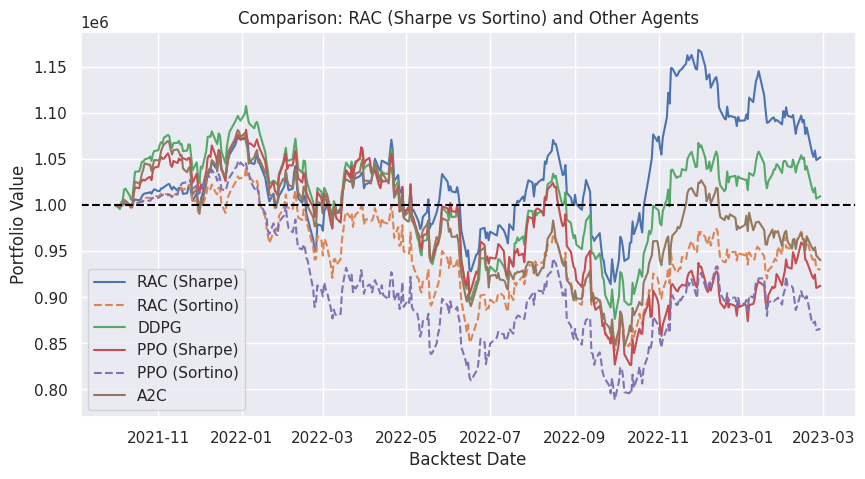

In [79]:
x = pd.to_datetime(df_account_value_rac_sharpe['date'])

plt.figure(figsize=(10, 5))

plt.plot(x, df_account_value_rac_sharpe['account_value'], label='RAC (Sharpe)')
plt.plot(x, df_account_value_rac_sortino['account_value'], label='RAC (Sortino)', linestyle='--')
plt.plot(x, df_account_value_ddpg['account_value'], label='DDPG')
plt.plot(x, df_account_value_ppo['account_value'], label='PPO (Sharpe)')
plt.plot(x, df_account_value_ppo_sortino['account_value'], label='PPO (Sortino)', linestyle='--')
plt.plot(x, df_account_value_a2c['account_value'], label='A2C')

plt.axhline(y=1e6, color='black', linestyle='--')
plt.xlabel('Backtest Date')
plt.ylabel('Portfolio Value')
plt.title('Comparison: RAC (Sharpe vs Sortino) and Other Agents')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-4.295%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2021-10-01
End date,2023-02-27
Total months,16
,Backtest
Annual return,-4.295%
Cumulative returns,-5.965%
Annual volatility,17.258%
Sharpe ratio,-0.17
Calmar ratio,-0.20
Stability,0.35
Max drawdown,-21.762%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,21.76,2021-12-29,2022-10-07,NaT,NaN
1,7.37,2021-11-08,2021-12-01,2021-12-27,36
2,0.80,2021-10-22,2021-10-27,2021-10-29,6
3,0.80,2021-10-07,2021-10-13,2021-10-14,6
4,0.24,2021-10-15,2021-10-18,2021-10-19,3


/usr/local/lib/python3.11/dist-packages/matplotlib/dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')
/usr/local/lib/python3.11/dist-packages/pyfolio/plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])


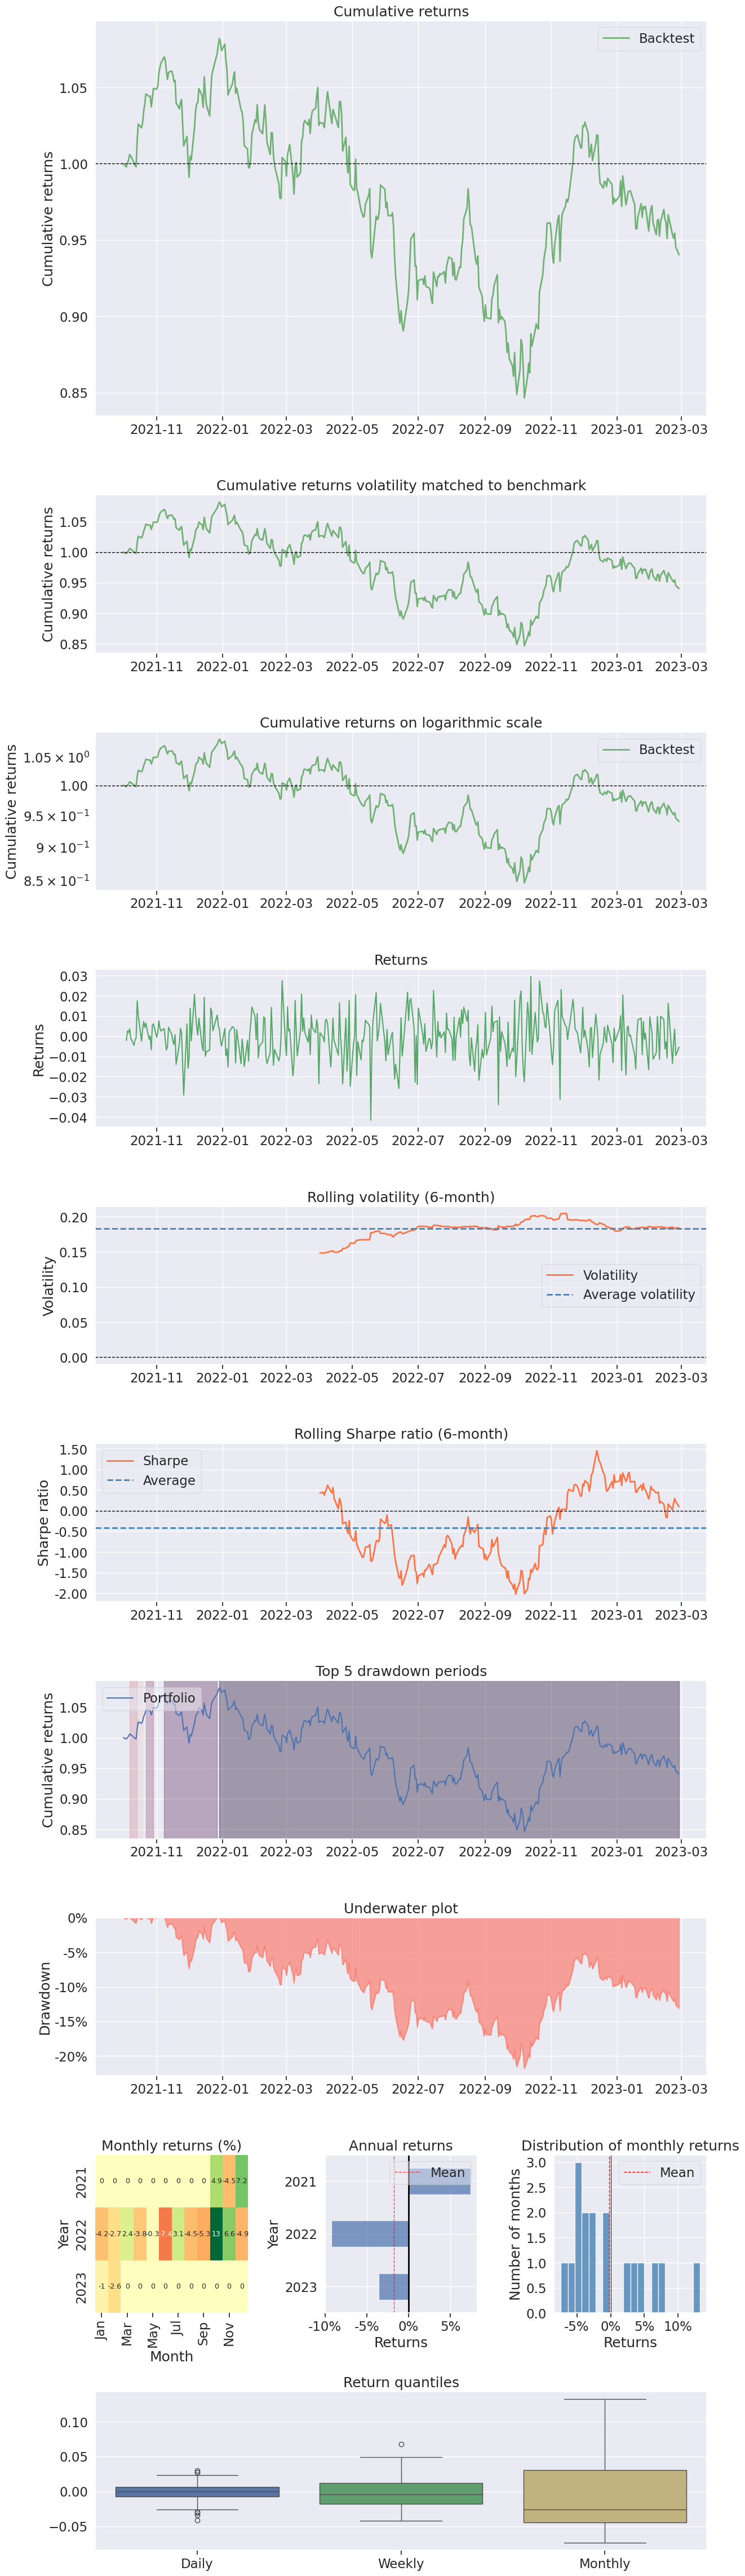

In [76]:
fig = pf.create_returns_tear_sheet(df_daily_return_a2c, return_fig=True)

In [ ]:
fig = pf.create_returns_tear_sheet(df_daily_return_ppo, return_fig=True)

In [ ]:
fig = pf.create_returns_tear_sheet(df_daily_return_ddpg, return_fig=True)

In [ ]:
fig = pf.create_returns_tear_sheet(df_daily_return_rac, return_fig=True)

In [ ]:
fig = pf.create_returns_tear_sheet(df_daily_return_ppot, return_fig=True)

/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2021-10-13
End date,2023-02-27
Total months,16
,Backtest
Annual return,7.8%
Cumulative returns,10.8%
Annual volatility,19.0%
Sharpe ratio,0.49
Calmar ratio,0.46
Stability,0.02
Max drawdown,-16.9%


AttributeError: ignored

In [77]:
df_dji_ = get_baseline(
        ticker="^DJI",
        start = TRADE_START_DATE,
        end = TRADE_END_DATE)

[*********************100%***********************]  1 of 1 completed

Shape of DataFrame:  (354, 8)


In [78]:
df_dji_stats = backtest_stats(df_dji_, value_col_name = 'close')
df_dji = pd.DataFrame()
df_dji['date'] = df_account_value_rac['date']
df_dji['account_value'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
df_dji.to_csv("df_dji.csv")
df_dji.to_csv("df_dji+.csv")

Annual return         -0.034876
Cumulative returns    -0.048644
Annual volatility      0.181612
Sharpe ratio          -0.105351
Calmar ratio          -0.158953
Stability              0.280983
Max drawdown          -0.219408
Omega ratio            0.982546
Sortino ratio         -0.146974
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.970602
Daily value at risk   -0.022957
dtype: float64


NameError: name 'df_account_value_rac' is not defined

In [ ]:
df_dji

In [ ]:
df_dji_daily_returns = get_daily_return(df_dji)
df_dji_daily_returns

In [ ]:
fig = pf.create_returns_tear_sheet(df_daily_return_rac, benchmark_rets = df_dji_daily_returns,return_fig=True)